**Roboflow Model**

With this notebook, the Roboflow model for solving the Cybathlon Vision Task "Finder" can be tested on an image containing all six objects that are included in the Cybathlon task.

First, the current version of the generated dataset will be downloaded from Roboflow by using an API key.

In [40]:
# Install Roboflow and access the model via an API key
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="I7dVIWdIMwjHsDnRwUWw")
project = rf.workspace("finder-task").project("object-finder-cexqc")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


Next, the testing image is imported. This image "all_items.png" must be located in the same folder as the jupyter notebook. This folder path must be used as the "home_path".

In [41]:
import os
from google.colab import drive
drive.mount('/content/drive')

# adjust this path to the folder containing the jupyter notebook and input image
home_path = '/content/drive/MyDrive/Cybathlon_Roboflow_model/'

# input and output images
input_image = os.path.join(home_path, 'all_items.png')
output_prediction = os.path.join(home_path, 'prediction.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Finally, the prediction is performed on the testing image and the results are saved in the home folder. It may take a few moments until the "predictions.jpg" file appears in the folder.

In [42]:
# build the model with the newest version
model = version.model

# test the prediction on an input image
print(model.predict(input_image, confidence=40, overlap=30).json())

# visualize the prediction
prediction = model.predict(input_image, confidence=40, overlap=30).save(output_prediction)

{'predictions': [{'x': 147.0, 'y': 439.5, 'width': 60.0, 'height': 61.0, 'confidence': 0.9511886835098267, 'class': 'mug', 'class_id': 3, 'detection_id': 'be6e50d1-95a8-4f96-8146-8a0ef4afc6e9', 'image_path': '/content/drive/MyDrive/Cybathlon_Roboflow_model/all_items.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 42.5, 'y': 262.0, 'width': 49.0, 'height': 46.0, 'confidence': 0.9469631314277649, 'class': 'banana', 'class_id': 1, 'detection_id': '4f5cfa07-37ce-47eb-8f75-c500657895fa', 'image_path': '/content/drive/MyDrive/Cybathlon_Roboflow_model/all_items.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 165.0, 'y': 336.0, 'width': 92.0, 'height': 30.0, 'confidence': 0.9332003593444824, 'class': 'bottle', 'class_id': 2, 'detection_id': '9750ca43-b1ad-4a19-bc61-9a026b309ae9', 'image_path': '/content/drive/MyDrive/Cybathlon_Roboflow_model/all_items.png', 'prediction_type': 'ObjectDetectionModel'}, {'x': 385.5, 'y': 43.5, 'width': 31.0, 'height': 29.0, 'confidence': 0.9261755

In the following plot, the predictions performed by the Roboflow model are visualized and compared to the input image.

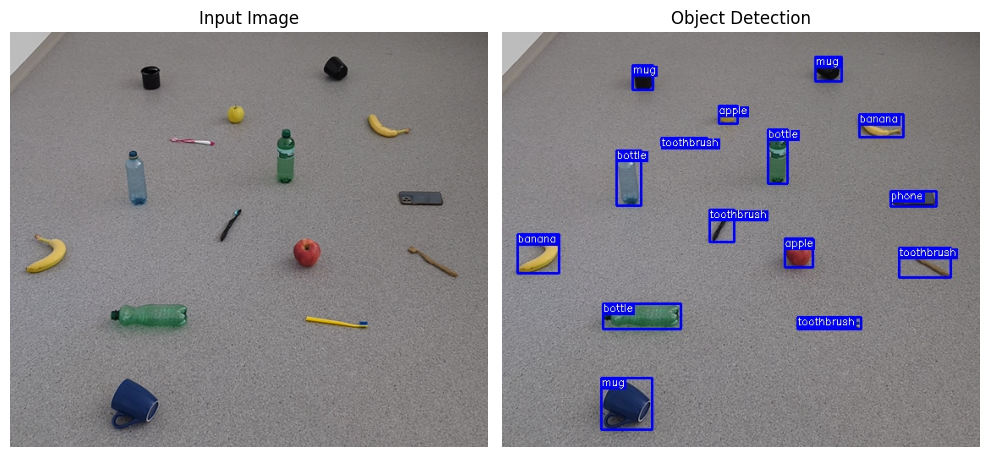

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread(input_image)
img2 = mpimg.imread(output_prediction)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# first subplot
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title('Input Image')

# second subplot
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title('Object Detection')

plt.tight_layout()
plt.show()